<a href="https://colab.research.google.com/github/aman-makode-11/MLPractice/blob/main/Practical3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn_dataset-testing-master.csv to customer_churn_dataset-testing-master.csv


In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('customer_churn_dataset-testing-master.csv')
print(df.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [11]:
# Preprocess data
# Separate features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical features
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

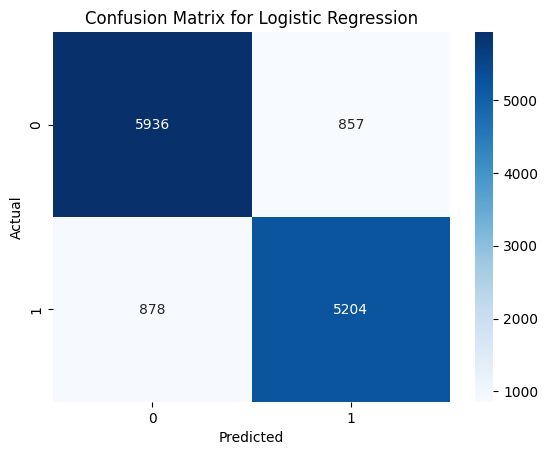

In [12]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Print model evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

Accuracy: 0.8652427184466019
Precision: 0.8586041907276027
Recall: 0.8556395922393949
F1-Score: 0.8571193280079058
ROC-AUC: 0.9421199202440292


Linear Regression Performance:
MAE: 0.2686431312233642
MSE: 0.1100023693545545
RMSE: 0.33166605095269325


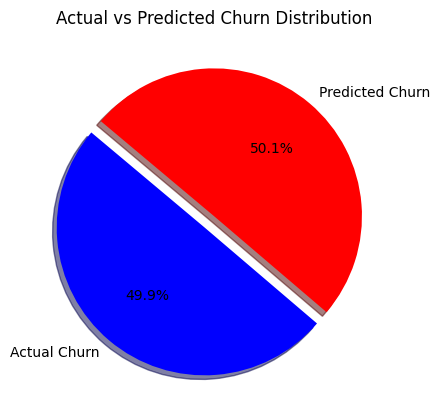

In [25]:
# Create a pipeline with preprocessing and linear regression
pipeline_lin_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the linear regression model
pipeline_lin_reg.fit(X_train, y_train)
y_pred_lin_reg = pipeline_lin_reg.predict(X_test)

# Print regression model evaluation metrics
mae_lin_reg = mean_absolute_error(y_test, y_pred_lin_reg)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
rmse_lin_reg = np.sqrt(mse_lin_reg)

print("Linear Regression Performance:")
print(f"MAE: {mae_lin_reg}")
print(f"MSE: {mse_lin_reg}")
print(f"RMSE: {rmse_lin_reg}")

actual_churn_count = sum(y_test.values)
predicted_churn_count = sum(y_pred_lin_reg)

labels = ['Actual Churn', 'Predicted Churn']
sizes = [actual_churn_count, predicted_churn_count]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode the first slice (if you want)

# Plotting pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

plt.title('Actual vs Predicted Churn Distribution')
plt.show()
